In [1]:

### READ RESULTS INTO PANDAS DATAFRAME
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

resultsdir = "../../../ae-results/"
# list all directories in resultsdir
#configs = [d for d in os.listdir(resultsdir) if os.path.isdir(os.path.join(resultsdir, d))]
configs = ['Baseline.yaml',
            "CoMeT1000-4-512-512.yaml",
            "CoMeT500-4-512-512.yaml",
            "CoMeT250-4-512-512.yaml",
            "CoMeT125-4-512-512.yaml",
            "CoMeT1000-4-512-256.yaml",
            "CoMeT500-4-512-256.yaml",
            "CoMeT250-4-512-256.yaml",
            "CoMeT125-4-512-256.yaml",
            "CoMeT1000-4-512-128.yaml",
            "CoMeT500-4-512-128.yaml",
            "CoMeT250-4-512-128.yaml",
            "CoMeT125-4-512-128.yaml",
            "CoMeT1000-4-512-64.yaml",
            "CoMeT500-4-512-64.yaml",
            "CoMeT250-4-512-64.yaml",
            "CoMeT125-4-512-64.yaml",
            "CoMeT1000-4-512-32.yaml",
            "CoMeT500-4-512-32.yaml",
            "CoMeT250-4-512-32.yaml",
            "CoMeT125-4-512-32.yaml",
        ]
#configs = ['Baseline.yaml', 'CMS1000-100.yaml', 'Graphene1000.yaml', 'CMS1000-100-c.yaml']
# print found configs
print('Found configs: {}'.format(configs))
# list all directories under all configs
workloads = []
for c in configs:
    workloads.append([d for d in os.listdir(os.path.join(resultsdir, c)) if os.path.isdir(os.path.join(resultsdir, c, d))])
# find only the intersection of all workloads
workloads = list(set.intersection(*map(set, workloads)))
# print found workloads
print('Found workloads: {}'.format(workloads))

stats_per_config_workload = []

# for every config + workload directory
for c in configs:
    for w in workloads:
        # find all files in the directory
        files = [f for f in os.listdir(os.path.join(resultsdir, c, w)) if os.path.isfile(os.path.join(resultsdir, c, w, f))]
        # find the stats file
        stat_files = [f for f in files if f.endswith('.stats')]
        # if there is a stats file
        if stat_files:
            for stat_file in stat_files:
                # if the stats_file has less than three lines skip it
                if len(open(os.path.join(resultsdir, c, w, stat_file)).readlines()) < 3:
                    continue
                
                # print the name of the stats_file
                print('Found stats file: {}'.format(os.path.join(os.path.join(resultsdir, c, w, stat_file))))

                extension = ''
                # if stats_file file name itself does not start with DDR4, parse it a bit
                if not stat_file.startswith('DDR4'):
                    # get the config name from the stats_file name
                    extension = '_'.join(stat_file.split('_')[:-1])
                    # prepend underscore to extension
                    extension = '_' + extension

                # read the stats file, name columns: 'name', 'value', 'description'
                df = pd.read_csv(os.path.join(resultsdir, c, w, stat_file), header=None).T
                df.columns = df.iloc[0]
                df.drop(0,inplace=True)
                # add a new column called 'config' with the config name
                df['config'] = c + extension
                # add a new column called 'workload' with the workload name
                df['workload'] = w
                # print the stats file
                # print('Config: {}, Workload: {}, Stats: {}'.format(c, w, df))
                # append the stats to the list
                df.reset_index(inplace=True, drop=True)
                stats_per_config_workload.append(df)
        else:
            print('Config: {}, Workload: {}, Stats: No stats file found'.format(c, w))

# concatenate all stats into one dataframe
stats = pd.concat(stats_per_config_workload)

# find elements where workload does not contain '-'
# these are multi core workloads
stats = stats[~stats['workload'].str.contains('-')]

# remove these two workloads: stream_10.trace and random_10.trace
stats = stats[~stats['workload'].isin(['stream10_200.trace', 'random10_200.trace'])]
# also from workloads
workloads = [w for w in workloads if not w in ['stream10_200', 'random10_200.trace']]

#remove configs that has RH32, AH and AAH in the name
stats = stats[~stats['config'].str.contains('RH32')]
stats = stats[~stats['config'].str.contains('AH')]
stats = stats[~stats['config'].str.contains('AAH')]

# replace 'Baseline' with 'Baseline0'
stats['config'] = stats['config'].str.replace('ae-results/', '')
stats['config'] = stats['config'].str.replace('../results/', '')
stats['config'] = stats['config'].str.replace('Baseline', 'Baseline0')

# add a new column that stores in integer the number in the config name
stats['nrh'] = stats['config'].str.extract('(\d+)').astype(int)

# remove numbers from config names
stats['config'] = stats['config'].str.replace('\d+', '')

# remove yaml from config names
stats['config'] = stats['config'].str.replace('.yaml', '')

print(stats['workload'].unique())
stats_copy = stats.copy()


Found configs: ['Baseline.yaml', 'CoMeT1000-4-512-512.yaml', 'CoMeT500-4-512-512.yaml', 'CoMeT250-4-512-512.yaml', 'CoMeT125-4-512-512.yaml', 'CoMeT1000-4-512-256.yaml', 'CoMeT500-4-512-256.yaml', 'CoMeT250-4-512-256.yaml', 'CoMeT125-4-512-256.yaml', 'CoMeT1000-4-512-128.yaml', 'CoMeT500-4-512-128.yaml', 'CoMeT250-4-512-128.yaml', 'CoMeT125-4-512-128.yaml', 'CoMeT1000-4-512-64.yaml', 'CoMeT500-4-512-64.yaml', 'CoMeT250-4-512-64.yaml', 'CoMeT125-4-512-64.yaml', 'CoMeT1000-4-512-32.yaml', 'CoMeT500-4-512-32.yaml', 'CoMeT250-4-512-32.yaml', 'CoMeT125-4-512-32.yaml']
Found workloads: ['h264_decode', '458.sjeng', 'ycsb_bserver', '557.xz', 'jp2_encode', '459.GemsFDTD', '519.lbm', '473.astar', 'tpch2', '483.xalancbmk', '511.povray', '445.gobmk', '403.gcc', 'jp2_decode', '507.cactuBSSN', 'ycsb_cserver', '462.libquantum', '456.hmmer', '508.namd', 'bfs_cm2003', '502.gcc', 'tpcc64', '505.mcf', 'tpch6', '470.lbm', '436.cactusADM', '447.dealII', 'wc_8443', '544.nab', '541.leela', 'ycsb_abgsave', '4

In [2]:





# use seaborn-deep style
sns.set(font_scale=1.0)
sns.set_style("whitegrid")
sns.set_palette("pastel", n_colors=4)

stats = stats_copy.copy()



# instructions per cycle (IPC) is record_cycles_insts_0 / record_cycs_core_0
stats['ramulator.ipc'] = stats['ramulator.record_insts_core_0'] / stats['ramulator.record_cycs_core_0']


stats['ramulator.rbmpki'] = (stats['ramulator.row_conflicts_channel_0_core'] + stats['ramulator.row_misses_channel_0_core']) /\
                            stats['ramulator.record_insts_core_0'] * 1000


# copy the IPC of the baseline config as to all configs
baseline = stats[stats['config'] == 'Baseline0']
baseline = baseline[['workload', 'ramulator.ipc', 'ramulator.read_latency_avg_0', 'ramulator.rbmpki', 'ramulator.window_full_stall_cycles_core_0']]
# baseline
baseline.columns = ['workload', 'ramulator.baseline_ipc', 'ramulator.baseline_read_latency_avg_0', 'ramulator.baseline_rbmpki', 'ramulator.baseline_stall_cycles']
print('baseline:')
print(baseline)

stats = pd.merge(stats, baseline, on='workload')


#hydra baseline
# hydra_baseline = stats[stats['config'] == 'Hydra-Baseline']
# hydra_baseline = hydra_baseline[['workload', 'ramulator.ipc']]
# # hydra_baseline
# hydra_baseline.columns = ['workload', 'ramulator.hydra_baseline_ipc']
# stats = pd.merge(stats, hydra_baseline, on='workload')

stats['ramulator.normalized_ipc'] = stats['ramulator.ipc'] / stats['ramulator.baseline_ipc']
stats['ramulator.normalized_read_latency'] = stats['ramulator.read_latency_avg_0'] / stats['ramulator.baseline_read_latency_avg_0']
stats['ramulator.normalized_stall_cycles'] = stats['ramulator.window_full_stall_cycles_core_0'] / stats['ramulator.baseline_stall_cycles']
stats['ramulator.normalized_rbmpki'] = stats['ramulator.rbmpki'] / stats['ramulator.baseline_rbmpki']


# normalized ipc for hydra is not correct, so we overwrite it with the correct value
# stats.loc[stats['config'].str.contains('Hydra'), 'ramulator.normalized_ipc'] = stats['ramulator.ipc'] / stats['ramulator.hydra_baseline_ipc']

# add the geometric normalized ipc average as a new workload to every config
geometric_mean = stats.groupby(['config','nrh'])['ramulator.normalized_ipc'].apply(lambda x: x.prod()**(1.0/len(x))).reset_index()
geometric_mean['workload'] = 'GeoMean'

#print(stats['config'])


stats = pd.concat([stats, geometric_mean])
print(stats['config'])
print(stats['workload'])

baseline:
         workload ramulator.baseline_ipc  \
0     h264_decode               0.429888   
0       458.sjeng               3.691404   
0    ycsb_bserver               1.859058   
0          557.xz               2.538057   
0      jp2_encode               2.409987   
..            ...                    ...   
0        444.namd               3.952819   
0    ycsb_eserver               1.993455   
0   531.deepsjeng               3.594825   
0     520.omnetpp               1.295571   
0        433.milc               0.865155   

   ramulator.baseline_read_latency_avg_0 ramulator.baseline_rbmpki  \
0                             181.188882                121.389455   
0                              67.093254                  0.158525   
0                              63.329721                  1.933325   
0                              78.209122                   2.20653   
0                              84.431963                   2.68478   
..                                   ... 

In [3]:
stats_clean = stats.copy()

['CoMeT1000-4-512-512' 'CoMeT500-4-512-512' 'CoMeT250-4-512-512'
 'CoMeT125-4-512-512' 'CoMeT1000-4-512-256' 'CoMeT500-4-512-256'
 'CoMeT250-4-512-256' 'CoMeT125-4-512-256' 'CoMeT1000-4-512-128'
 'CoMeT500-4-512-128' 'CoMeT250-4-512-128' 'CoMeT125-4-512-128'
 'CoMeT1000-4-512-64' 'CoMeT500-4-512-64' 'CoMeT250-4-512-64'
 'CoMeT125-4-512-64' 'CoMeT1000-4-512-32' 'CoMeT500-4-512-32'
 'CoMeT250-4-512-32' 'CoMeT125-4-512-32']


/tmp/ipykernel_1468746/1965420627.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_no_baseline['counters'] = stats_no_baseline['config'].apply(lambda x: int(re.search(r'CoMeT(?:1000|125|250|500)+-\d+-(\d+)-\d+', x).group(1)) if re.search(r'CoMeT(?:1000|125|250|500)+-\d+-(\d+)-\d+', x) else 0)
/tmp/ipykernel_1468746/1965420627.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_no_baseline['hashes'] =   stats_no_baseline['config'].apply(lambda x: int(re.search(r'CoMeT(?:1000|125|250|500)+-(\

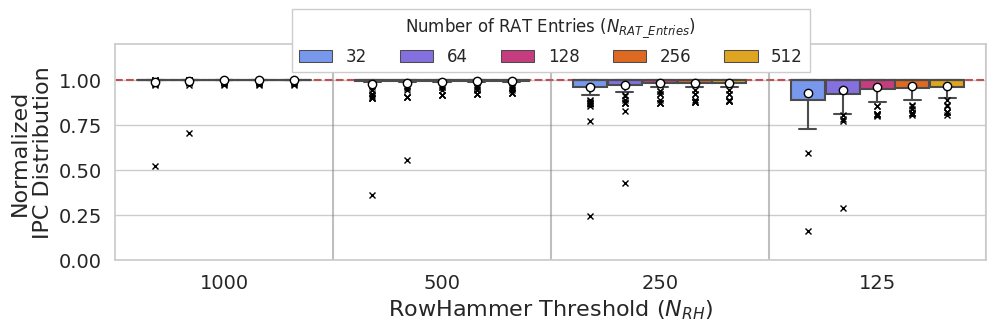

In [4]:
import re

stats_sweep = stats_clean.copy()


sns.set(font_scale=1.0)
sns.set_style("whitegrid")
#sns.set_palette("viridis", n_colors=5)

# sns set color palette
comet_palette = ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000']
sns.set_palette(comet_palette, n_colors=5)

# drop all configs except the ones with CMS 
stats_no_baseline = stats[stats['config'].str.contains('CoMeT')]

print(stats_no_baseline['config'].unique())

stats_no_baseline['counters'] = stats_no_baseline['config'].apply(lambda x: int(re.search(r'CoMeT(?:1000|125|250|500)+-\d+-(\d+)-\d+', x).group(1)) if re.search(r'CoMeT(?:1000|125|250|500)+-\d+-(\d+)-\d+', x) else 0)
stats_no_baseline['hashes'] =   stats_no_baseline['config'].apply(lambda x: int(re.search(r'CoMeT(?:1000|125|250|500)+-(\d+)-\d+-\d+', x).group(1)) if re.search(r'CoMeT(?:1000|125|250|500)+-(\d+)-\d+-\d+', x) else 0)
stats_no_baseline['entries'] =  stats_no_baseline['config'].apply(lambda x: int(re.search(r'CoMeT(?:1000|125|250|500)+-\d+-\d+-(\d+)', x).group(1)) if re.search(r'CoMeT(?:1000|125|250|500)+-\d+-\d+-(\d+)', x) else 0)

# change all configs with name starting with CMS to CMS
stats_no_baseline['config'] = stats_no_baseline['config'].apply(lambda x: 'CoMeT' if re.search(r'CoMeT\d+-\d+-\d+-\d+', x) else x)

# drop entries with empty config
stats_no_baseline = stats_no_baseline[stats_no_baseline['config'].notna()]



# order nRH from high to low
stats_no_baseline['counters'] = pd.Categorical(stats_no_baseline['counters'], categories=[512], ordered=True)

stats_no_baseline['hashes'] = pd.Categorical(stats_no_baseline['hashes'], categories=[4], ordered=True)

stats_no_baseline['entries'] = pd.Categorical(stats_no_baseline['entries'], categories=[32,64,128,256,512], ordered=True)
stats_no_baseline['nrh'] = pd.Categorical(stats_no_baseline['nrh'], categories=[1000,500,250,125], ordered=True)

# order config in this order: CMS, Graphene
stats_no_baseline['config'] = pd.Categorical(stats_no_baseline['config'], categories=['CoMeT'], ordered=True)


#boxplot of normalized IPC
fig, ax = plt.subplots(figsize=(10, 3.6))
# show mean values as well
ax = sns.boxplot(x="nrh", y="ramulator.normalized_ipc", hue="entries", data=stats_no_baseline, 
                 showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"}, 
                 showfliers=True, flierprops={'marker': 'x', 'markerfacecolor': 'black', 'markeredgecolor': 'black'})
ax.set_xlabel('RowHammer Threshold ($N_{RH}$)')
ax.set_ylabel('Normalized\nIPC Distribution')
# draw a red line at y = 1.0, label it as baseline IPC
ax.axhline(y=1.0, color='r', linestyle='--')
# write above the red line 'baseline IPC'
#ax.text(0.02, 0.91, 'baseline IPC', color='#e74c3c', transform=ax.transAxes, fontsize=15)
# extend the y axis to 1.2
ax.set_ylim(0, 1.2)
# color the 5th y tick red
#ax.get_yticklabels()[4].set_color('#e74c3c')
# make axis tick font bigger
ax.tick_params(axis='both', which='major', labelsize=14)
# draw vertical lines to separate the rowhammer threshold values
ax.axvline(x=0.5, color='grey', linestyle='-', alpha=0.5)
ax.axvline(x=1.5, color='grey', linestyle='-', alpha=0.5)
ax.axvline(x=2.5, color='grey', linestyle='-', alpha=0.5)
ax.axvline(x=3.5, color='grey', linestyle='-', alpha=0.5)
# make x and y axis labels bigger
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)

# Customize the whiskers and borders
ax.lines[0].set_color('black')  # Set the color of the whiskers\


# put the legend on top of the plot
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=5, fancybox=True, shadow=True, fontsize=12)
# add legend title as "counters per hash"
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=5, fancybox=False, shadow=False, fontsize=12, title='Number of RAT Entries ($N_{RAT\_Entries}$)', title_fontsize=12, framealpha=1)

plt.tight_layout()
plt.show()

# save figure
fig.savefig('ratsizesweep.pdf', bbox_inches='tight')
# export data to csv
stats_no_baseline.to_csv('ratsizesweep.csv', index=False)

# list mean normalized_ipc at 1000 nRH for all configs
#print(stats_no_baseline.groupby(['config','nrh'])['ramulator.normalized_ipc'].mean())




In [5]:
# create a subset of the dataframe that only contains workload, config, nrh, normalized_ipc
stats_no_baseline_subset = stats_no_baseline[['workload', 'config', 'nrh', 'entries', 'ramulator.normalized_ipc']]

# print number of workloads per config per rat size
print(stats_no_baseline_subset.groupby(['config','nrh','entries'])['workload'].count())

# dump only comet125-4-512-128 normalized ipcs to csv


config  nrh   entries
CoMeT   1000  32         62
              64         62
              128        62
              256        62
              512        62
        500   32         62
              64         62
              128        62
              256        62
              512        62
        250   32         62
              64         62
              128        62
              256        62
              512        62
        125   32         62
              64         62
              128        62
              256        62
              512        62
Name: workload, dtype: int64
